In [13]:

import torch
from thermostability.thermo_pregenerated_dataset import ThermostabilityPregeneratedDataset
import umap.umap_ as umap
import numpy
from typing import Union
from torch.nn.functional import pad
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt


In [14]:
def zero_padding(s_s_list: "list[tuple[torch.Tensor, torch.Tensor]]", fixed_size: Union[int, None]=None):
    max_size = fixed_size if fixed_size else max([s_s.size(0) for s_s, _ in s_s_list])

    padded_s_s = []
    temps =[]
    for s_s, temp in s_s_list:
        dif = max_size - s_s.size(0) 
        padded = pad(s_s, (0,0,dif,0), "constant", 0)
        padded_s_s.append(padded)
        temps.append(temp)
    results= torch.stack(padded_s_s, 0).unsqueeze(1), torch.stack(temps)
    return results

def zero_padding700(s_s_list: "list[tuple[torch.Tensor, torch.Tensor]]"):
    return zero_padding(s_s_list, 700)

In [15]:
trainSet = ThermostabilityPregeneratedDataset("train.csv")
valSet = ThermostabilityPregeneratedDataset("val.csv")

dataloaders = {
    "train": DataLoader(trainSet, batch_size=1, shuffle=True, num_workers=0),
    "val": DataLoader(valSet, batch_size=1, shuffle=False, num_workers=0, collate_fn= zero_padding700)
}

Omitted 45385 sequences of train.csv because they have not been pregenerated
Omitted 4660 sequences of val.csv because they have not been pregenerated


In [16]:
flattened_tensors = None
temps = None
i = 0
sample1 = None
sample2 = None
sample3 = None
for batch in dataloaders['val']:
    if i == 0:
        sample1 = batch[0]
    if i == 1:
        sample2 = batch[0]
    if i == 2:
        sample3 = batch[0]
        break
    i += 1

In [17]:
sample1.shape
sample2.shape
sample2[0,0,:,:].shape

torch.Size([700, 1024])

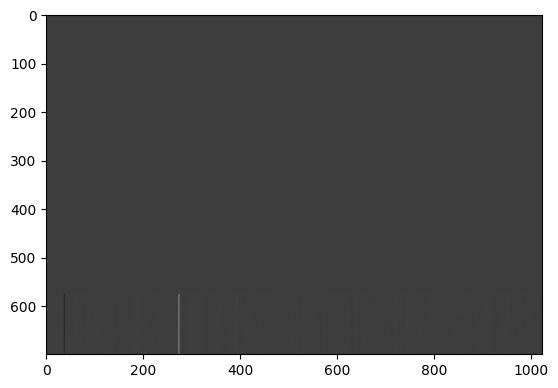

In [18]:
plt.imshow(sample1[0,0,:,:], cmap='gray')

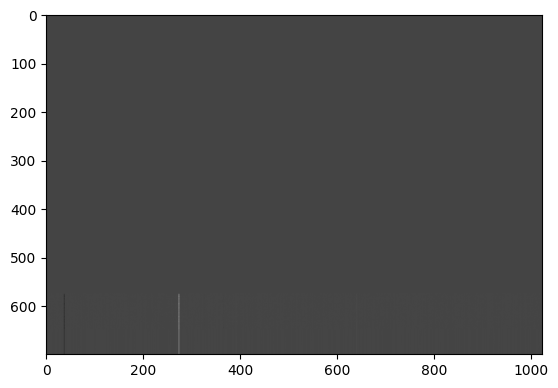

In [19]:
plt.imshow(sample2[0,0,:,:], cmap='gray')

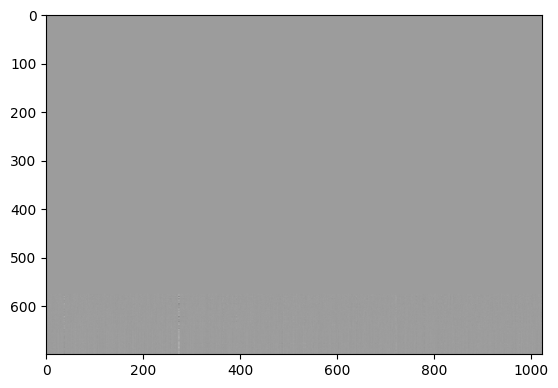

In [21]:
plt.imshow(sample1[0,0,:,:] - sample2[0,0,:,:], cmap='gray')

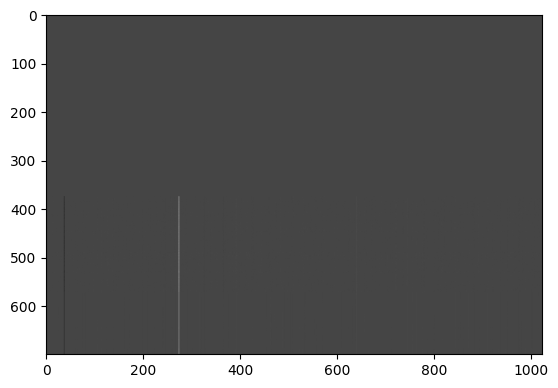

In [20]:
plt.imshow(sample3[0,0,:,:], cmap='gray')